# Final Project Report: Data analysis of a cyclist counting station in Münster for the Street : Weseler Straße.

This project uses open data from Mobilithek (https://mobilithek.info/offers/-8377471639463689219 and https://www.stadt-muenster.de/verkehrsplanung/verkehr-in-zahlen/radverkehrszaehlungen/weseler-strasse) to provide the data accumulated by the city of Münster for counting the number of cyclist going in and out of the counting station in the Weseler Straße. We will work on two different dataset with the same data to provide a comparison analysis between 2018 and 2022 of the number of cyclists.

The question that interests us is: By knowing the environmental issues nowadays which play an increasingly important role, did the inhabitants of Münster succeed in adopting a more environment friendly lifestyle by avoiding expensive means of transport in co2?
In our case, the study is conducted on the number of cyclists.

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. Most of these dependencies are comon to Data Science project, and will help us to perform different analysis on our data.

In [2]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install matplotlib
%pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data
Create a pandas dataframe using the local sqlite file: `sqlite:///data/verkehrszaehlungen.sqlite`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_2018 = pd.read_sql_table('fahraddverkehr_2018', 'sqlite:///data/verkehrszaehlungen.sqlite')
df_2022 = pd.read_sql_table('fahraddverkehr_2022', 'sqlite:///data/verkehrszaehlungen.sqlite')

#take a look at our data
print(df_2018)
print(df_2022)

#Drop useless or metadata rows 
#here the last row is about the sum which we don't need
df_2018 = df_2018.drop(df_2018.index[-1])

                     Zeit  Weseler Straße (gesamt)  \
0      1. Jan. 2018 00:00                       19   
1      1. Jan. 2018 01:00                       35   
2      1. Jan. 2018 02:00                       49   
3      1. Jan. 2018 03:00                       37   
4      1. Jan. 2018 04:00                       24   
...                   ...                      ...   
8755  31. Dez. 2018 20:00                       60   
8756  31. Dez. 2018 21:00                       38   
8757  31. Dez. 2018 22:00                       21   
8758  31. Dez. 2018 23:00                       61   
8759                Summe                  1164622   

      Weseler Straße FR stadteinwärts  Weseler Straße FR stadtauswärts  \
0                                11.0                              8.0   
1                                19.0                             16.0   
2                                28.0                             21.0   
3                                20.0                  

## Key facts about our data.

Before getting to the heart of the matter, it is always important to understand exactly what type of data is available. The next sections will serve as data analysis as well as presentation of important facts of our data.

In [31]:
#General information about the data

df_2018.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zeit                             8759 non-null   object 
 1   Weseler Straße (gesamt)          8759 non-null   int64  
 2   Weseler Straße FR stadteinwärts  8759 non-null   float64
 3   Weseler Straße FR stadtauswärts  8759 non-null   float64
 4   Wetter                           8759 non-null   object 
 5   Temperatur (°C)                  8759 non-null   float64
 6   Luftfeuchtigkeit (%)             8759 non-null   float64
 7   Gefühlte Temperatur (°C)         8759 non-null   float64
 8   Regen (mm)                       8759 non-null   float64
 9   Wind (km/h)                      8759 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 684.4+ KB


In [32]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Zeit                             8760 non-null   datetime64[ns]
 1   Weseler Straße                   8759 non-null   float64       
 2   Weseler Straße FR stadteinwärts  8759 non-null   float64       
 3   Weseler Straße FR stadtauswärts  8759 non-null   float64       
 4   Wetter                           8760 non-null   object        
 5   Temperatur (°C)                  8759 non-null   float64       
 6   Luftfeuchtigkeit (%)             8759 non-null   float64       
 7   Regen (mm)                       8759 non-null   float64       
 8   Wind (km/h)                      8759 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 616.1+ KB


#### Check for missing values

One last step, before getting into the analysis, is to check the quality of the dataset. First, we printed with the `.info()` method of pandas the key facts of each columns (type, name of columns, Non-Null count).
To be sure of the quality of the data, the methods `.describe()` and `.isnull()` helps us to dermine anything we should drop or that doesn't make sense in it.

In [8]:
print("\nSummary statistics of the dataset:")
print(df_2018.describe())




Summary statistics of the dataset:
       Weseler Straße (gesamt)  Weseler Straße FR stadteinwärts  \
count              8759.000000                      8759.000000   
mean                132.962895                        78.629181   
std                 111.528437                        70.492235   
min                   0.000000                         0.000000   
25%                  30.000000                        14.000000   
50%                 112.000000                        62.000000   
75%                 207.000000                       125.000000   
max                 741.000000                       487.000000   

       Weseler Straße FR stadtauswärts  Temperatur (°C)  Luftfeuchtigkeit (%)  \
count                      8759.000000      8759.000000           8759.000000   
mean                         54.333714        11.529969             74.833314   
std                          43.814992         7.925967             14.146231   
min                           0.0000

In [9]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df_2018.isnull().sum())


Missing values in the dataset:
Zeit                               0
Weseler Straße (gesamt)            0
Weseler Straße FR stadteinwärts    0
Weseler Straße FR stadtauswärts    0
Wetter                             0
Temperatur (°C)                    0
Luftfeuchtigkeit (%)               0
Gefühlte Temperatur (°C)           0
Regen (mm)                         0
Wind (km/h)                        0
dtype: int64


#### Max values

Extracting the max values of the cyclists counting column would inform us of the peak of cyclists within the analysed period. Doing that for the year 2018 and 2022 gives us an overview of which year had the highest peak of cyclists activity. It is important to notice that extrem changes or a very high "peak" in the data may represent an event

In [4]:
#maximum values and analyse at what time (2018 and 2022)


#max count 2018 + time
max_2018 = df_2018["Weseler Straße (gesamt)"].max()
max_count_time_2018 = df_2018["Weseler Straße (gesamt)"].idxmax()

#max count 2022 + time
max_2022 = df_2022["Weseler Straße"].max()
max_count_time_2022 = df_2022["Weseler Straße"].idxmax()
max_time = df_2022["Zeit"][max_count_time_2022]
timestamp = pd.Timestamp(max_time)
timestamp_str = str(timestamp)
print("Max amount of cyclist has been noticed at " + df_2018["Zeit"][max_count_time_2018] + " with " + str(max_2018) + " cyclists in 2018")
print("Max amount of cyclist has been noticed at " + timestamp_str + " with " + str(max_2022) + " cyclists in 2022")


Max amount of cyclist has been noticed at 27. Jun. 2018 15:00 with 741 cyclists in 2018
Max amount of cyclist has been noticed at 2022-10-25 07:00:00 with 497.0 cyclists in 2022


#### Averages

An important metric for comparision and analysis of data is the average or in the python the 'mean' value of the different columns of interest. In our case, we would be interested to see what was the average count of cyclists during the year for the dataset 2018 and 2022. 

A helper method will then provide a calculation of the difference between the both years to conclude about which year had more active cyclists activity in the street : Weseler Straße of Münster

In [5]:
# Summary statistics
def calculate_percentage_difference(old_value, new_value):
    difference = new_value - old_value
    percentage_difference = (difference / old_value) * 100
    return percentage_difference

# print(df_2018["Weseler Straße (gesamt)"].describe())
# print("-------------------")
# print(df_2022["Weseler Straße"].describe())
avg_2018 = round(df_2018["Weseler Straße (gesamt)"].mean())
avg_2022 = round(df_2022["Weseler Straße"].mean())

print("Average Number of Cyclists in 2018 was: " + str(avg_2018))
print("Average Number of Cyclists in 2022 was: " + str(avg_2022))
print("The difference is about: " + str(round(calculate_percentage_difference(avg_2018, avg_2022))) + " %")


Average Number of Cyclists in 2018 was: 133
Average Number of Cyclists in 2022 was: 124
The difference is about: -7 %


# Big data sets, what to do?

A problem encountered during the exploration of the data, is the fact that datasets with a big number of data points are hard to plot. Such scatters, and line plots can not compute each data point into a logical graph.

The main interest and goal of taking the two dataset with same data but with different periods of time is to perfom a comparision.
`df_2018` and `df_2022` both contain information about the cyclists. Therefore we need to create a new dataset that will merge the needed information(column). Afterwards, we will take care of the numerous datapoints problem.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#graphical comparision of the counting between 2018 and 2022 

columns_to_drop_2018 = []
columns_to_drop_2022 = []

for i in df_2018.columns:
    if i != "Weseler Straße (gesamt)" and i!= "Zeit":
        columns_to_drop_2018.append(i)

for i in df_2022.columns:
    if i != "Weseler Straße" and i!= "Zeit":
        columns_to_drop_2022.append(i)
        
df_2018_clean = df_2018.drop(columns=columns_to_drop_2018)
df_2018_clean = df_2018_clean.rename(columns={"Weseler Straße (gesamt)": "Weseler Straße 2018"})
df_2022_clean = df_2022.drop(columns=columns_to_drop_2022)
df_2022_clean = df_2022_clean.rename(columns={"Weseler Straße": "Weseler Straße 2022"})


merged_df = df_2018_clean.join(df_2022_clean["Weseler Straße 2022"])

# print(df_2022_clean.head())
# print(df_2018_clean.head())
print(merged_df.head())

                 Zeit  Weseler Straße 2018  Weseler Straße 2022
0  1. Jan. 2018 00:00                   19                 22.0
1  1. Jan. 2018 01:00                   35                 45.0
2  1. Jan. 2018 02:00                   49                 52.0
3  1. Jan. 2018 03:00                   37                 61.0
4  1. Jan. 2018 04:00                   24                 51.0


Perform a comparision and show it as a graph:


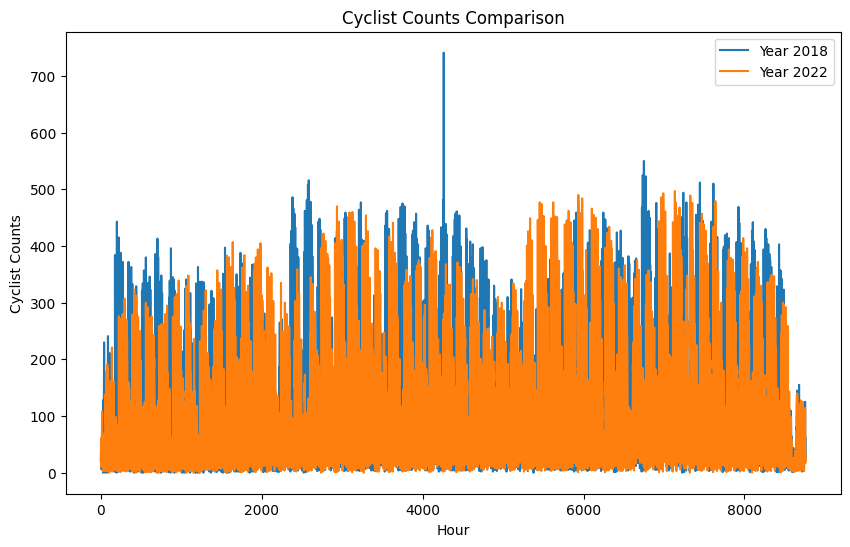

In [11]:
year_1_counts = merged_df["Weseler Straße 2018"]  # Get the cyclist counts for Year 2018
year_2_counts = merged_df["Weseler Straße 2022"]  # Get the cyclist counts for Year 2022


# Plotting the cyclist counts for each year
plt.figure(figsize=(10, 6))
plt.plot(year_1_counts, label="Year 2018")
plt.plot(year_2_counts, label="Year 2022")
plt.xlabel("Hour")
plt.ylabel("Cyclist Counts")
plt.title("Cyclist Counts Comparison")
plt.legend()
plt.show()

#### Review

As we can see, the graph is not as concluent as expected. Overall we can recognize more activity in the beginning of the year, in the middle and at the end of the year 2018. 

### Sampling or Aggregating

Big datasets may not deliver the needed information within graphs, therefore different methods exist to help "dividing" the data in a way that makes sense.

First example : 
_Aggregation_.

We know that our data is represented as an hourly data over a year. We decide then to aggregate the data into a monthly timeframe.This emplies of course that we are taking the mean value of the whole monthly measurements.

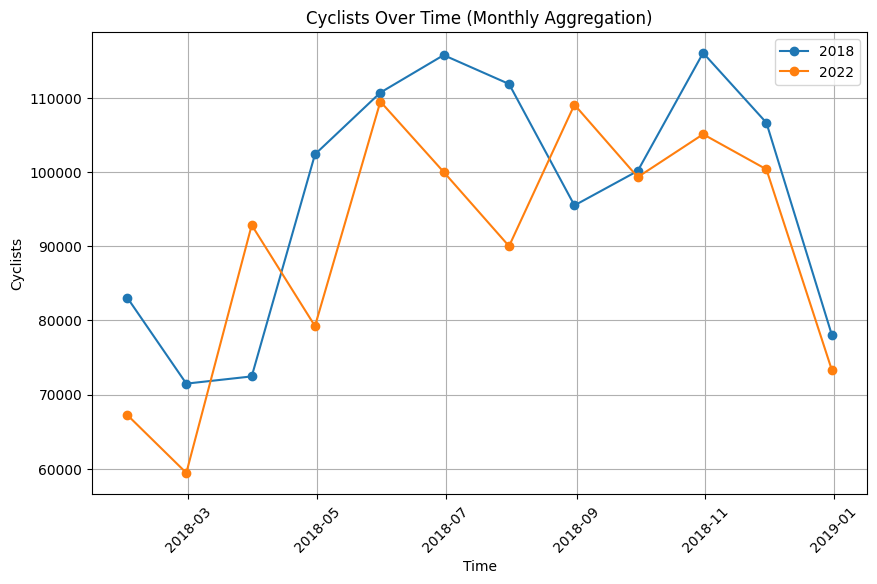

In [34]:
month_mapping = {
    'Jan.': 'Jan',
    'Febr.': 'Feb',
    'Mrz.': 'Mar',
    'Apr.': 'Apr',
    'Mai': 'May',
    'Jun.': 'Jun',
    'Jul.': 'Jul',
    'Aug.': 'Aug',
    'Sept.': 'Sep',
    'Okt.': 'Oct',
    'Nov.': 'Nov',
    'Dez.': 'Dec'
}

merged_df['Zeit'] = pd.to_datetime(merged_df['Zeit'].replace(month_mapping, regex=True), format='%d. %b %Y %H:%M')

# Aggregate data by month and calculate the sum of cyclists
df_monthly = merged_df.groupby(pd.Grouper(key='Zeit', freq='M')).sum()

# Extract the relevant columns
time = df_monthly.index
cyclists_2018 = df_monthly['Weseler Straße 2018']
cyclists_2022 = df_monthly['Weseler Straße 2022']


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time, cyclists_2018, marker='o', label='2018')
plt.plot(time, cyclists_2022, marker='o', label='2022')
plt.xlabel('Time')
plt.ylabel('Cyclists')
plt.title('Cyclists Over Time (Monthly Aggregation)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



With this aggregation we have the clear confirmation that the month of 2018 did provide more active cyclists (10 of the 12 monthly datapoints are <b>higher</b> that the ones of 2022)

# Correlation

Correlation studies can be very important in some cases. Several labels of a dataset can have a more or less important dependency to each other called a `correlation`.

In our case, different datatypes are present in addition to the counted number of cyclists, for example the weather situation. Indeed we have data for each hour of metering on: the air quality, the temperature and finally the wind and rain situation.

Even if the correlation may be obvious, let's use correlation for the sake of the exploration in our analysis.

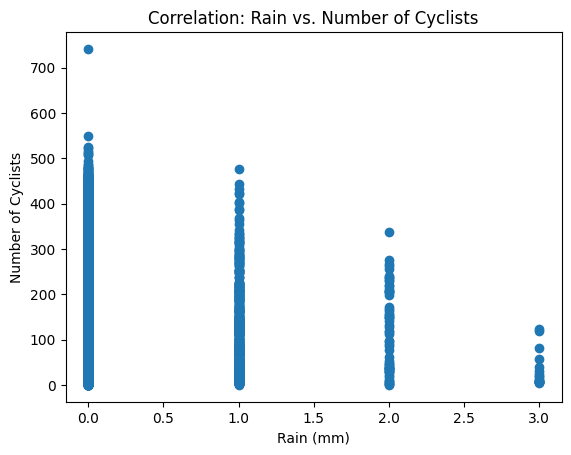

In [14]:
#Correlation between number of cyclists and rain situation
import random
columns_to_drop_2018 = []
columns_to_drop_2022 = []

for i in df_2018.columns:
    if i != "Weseler Straße (gesamt)" and i!= "Zeit" and i!= "Regen (mm)":
        columns_to_drop_2018.append(i)

for i in df_2022.columns:
    if i != "Weseler Straße" and i!= "Zeit" and i!= "Regen (mm)":
        columns_to_drop_2022.append(i)

df_2018_corr = df_2018.drop(columns=columns_to_drop_2018)
df_2022_corr = df_2022.drop(columns=columns_to_drop_2022)


cyclists = df_2018_corr['Weseler Straße (gesamt)']
rain = df_2018_corr['Regen (mm)']



plt.scatter(df_2018_corr['Regen (mm)'], df_2018_corr['Weseler Straße (gesamt)'])
plt.xlabel('Rain (mm)')
plt.ylabel('Number of Cyclists')
plt.title('Correlation: Rain vs. Number of Cyclists')
plt.show()

As seen before, a sampling or an aggregation may show a clearer correlaion between the Rain and the number of cyclists. Let's sample the data and draw the graph again:

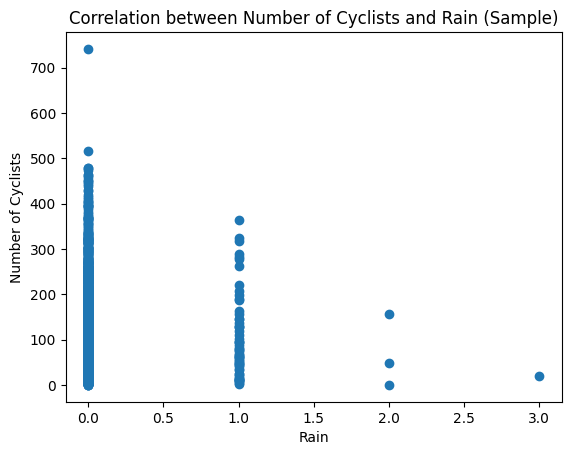

In [25]:
# Set the random seed for reproducibility
random.seed(42)

# Randomly select a sample from the dataset
sample_size =1000  # Adjust the sample size as desired
indices = random.sample(range(len(df_2018_corr)), sample_size)
sample_cyclists = cyclists[indices]
sample_rain = rain[indices]

# Create a scatter plot of the sample
plt.scatter(sample_rain, sample_cyclists)
plt.xlabel('Rain')
plt.ylabel('Number of Cyclists')
plt.title('Correlation between Number of Cyclists and Rain (Sample)')
plt.show()


Next, we can put the number of cyclists against the weather to check if the weather condition have a real impact on the number of cyclists:

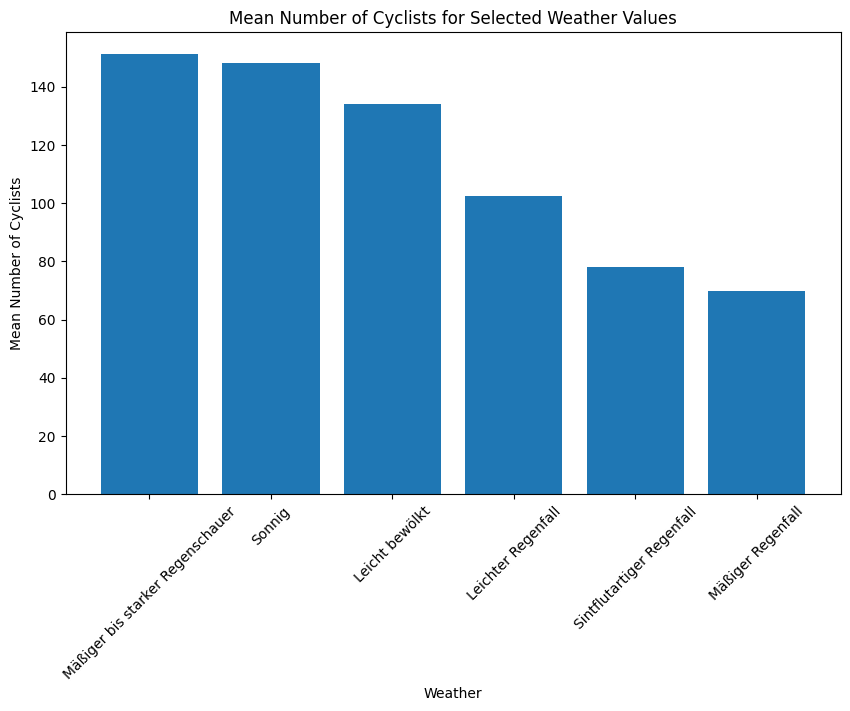

In [30]:
sampled_df = df_2018.sample(n=1000)

# Define the specific weather values you want to include in the plot
selected_weather_values = ['Sonnig', "Mäßiger Regenfall", "Leichter Regenfall", 'Mäßiger bis starker Regenschauer', 'Leicht bewölkt', "Sintflutartiger Regenfall"]

# Filter the data for the selected weather values
filtered_df = sampled_df[sampled_df['Wetter'].isin(selected_weather_values)]

# Group the filtered data by weather and calculate the mean number of cyclists for each weather category
grouped_data = filtered_df.groupby('Wetter')['Weseler Straße (gesamt)'].mean().reset_index()

# Sort the data based on the mean number of cyclists in descending order
grouped_data = grouped_data.sort_values(by='Weseler Straße (gesamt)', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Wetter'], grouped_data['Weseler Straße (gesamt)'])
plt.xlabel('Weather')
plt.ylabel('Mean Number of Cyclists')
plt.title('Mean Number of Cyclists for Selected Weather Values')
plt.xticks(rotation=45)
plt.show()

As expected, a rainy street condition is definitely a factor of not taking the bike to go out.

# Conclusion

The retrieved datasets are provided quite clean. Indeed, there was not much cleaning work needed. We can then respond to the main problem which was to study the situation of cyclists in the city of Muenster. After analyzing the two datasets of 2018 and 2022, there is a clear decrease in the counting of cyclists in the Weselerstraße. As shown above, there is a drop of 7% between the two years.
The years 2020 and 2021 were not taken into account due to the COVID crisis, which would then have distorted the numbers linked to the analysis made.
Moreover the weather situation influences the number of cyclists in that street by more than 50%. A rainy day would attract more than 50% less cyclists.

Over a year and all the cycling streets, we can wonder if it won't be worth thinking about or testing anti-rain solutions for the cycling roads. This would have a definitely great ecological impact given the growing awareness of this subject.
In addition, we can make the suggestion that the city of Münster should re-sensitize its inhabitants to the use of other means of transport than cars such as the bicycle, given that the number of cyclists in 4 years has fallen by 7% while the theme of the environment is getting increasingly important. This can be done by advertising it within all the possible media (TV, Radio..) or by sticking posters for environnement prevention and bicycle using in the most active spots of the city.
